In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("DataSets/Universities.csv")
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [3]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


<AxesSubplot:>

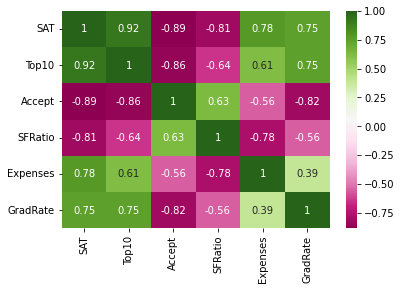

In [5]:
# Correlation
sns.heatmap(df.corr(),cmap="PiYG",annot=True)

In [6]:
# Segregating
X = df.iloc[:,1:].values
X

array([[ 1310,    89,    22,    13, 22704,    94],
       [ 1415,   100,    25,     6, 63575,    81],
       [ 1260,    62,    59,     9, 25026,    72],
       [ 1310,    76,    24,    12, 31510,    88],
       [ 1280,    83,    33,    13, 21864,    90],
       [ 1340,    89,    23,    10, 32162,    95],
       [ 1315,    90,    30,    12, 31585,    95],
       [ 1255,    74,    24,    12, 20126,    92],
       [ 1400,    91,    14,    11, 39525,    97],
       [ 1305,    75,    44,     7, 58691,    87],
       [ 1380,    94,    30,    10, 34870,    91],
       [ 1260,    85,    39,    11, 28052,    89],
       [ 1255,    81,    42,    13, 15122,    94],
       [ 1081,    38,    54,    18, 10185,    80],
       [ 1375,    91,    14,     8, 30220,    95],
       [ 1005,    28,    90,    19,  9066,    69],
       [ 1360,    90,    20,    12, 36450,    93],
       [ 1075,    49,    67,    25,  8704,    67],
       [ 1240,    95,    40,    17, 15140,    78],
       [ 1290,    75,    50,   

# KMeans

In [7]:
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3,init="k-means++",n_init=10,max_iter=300)
LABELS = KM.fit_predict(X)
LABELS

array([0, 2, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1])

In [8]:
Centroids = KM.cluster_centers_
Centroids

array([[1.18100000e+03, 6.53636364e+01, 5.02727273e+01, 1.59090909e+01,
        1.48715455e+04, 8.29090909e+01],
       [1.32916667e+03, 8.48333333e+01, 2.98333333e+01, 1.08333333e+01,
        3.32372500e+04, 9.06666667e+01],
       [1.36000000e+03, 8.75000000e+01, 3.45000000e+01, 6.50000000e+00,
        6.11330000e+04, 8.40000000e+01]])

In [9]:
centroid_df = pd.DataFrame(Centroids,columns=["A","B","C","D","E","F"])
centroid_df

,A,B,C,D,E,F
0,1181.000000,65.363636,50.272727,15.909091,14871.545455,82.909091
1,1329.166667,84.833333,29.833333,10.833333,33237.250000,90.666667
2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000


In [10]:
df["KMeans"] = LABELS

# Elbow Technique

In [11]:
WCSS = []
for i in range(1,20):
    KM = KMeans(n_clusters=i,init="k-means++",n_init=10,max_iter=300)
    KM.fit(X)
    WCSS.append(KM.inertia_)

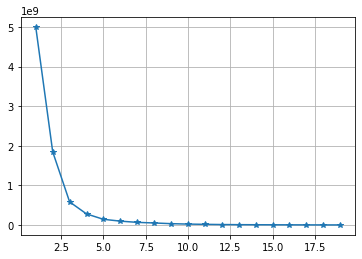

In [12]:
plt.plot(range(1,20),WCSS,marker="*")
plt.grid()
plt.show()


- 3 clusters are the best choice

<AxesSubplot:xlabel='Accept', ylabel='GradRate'>

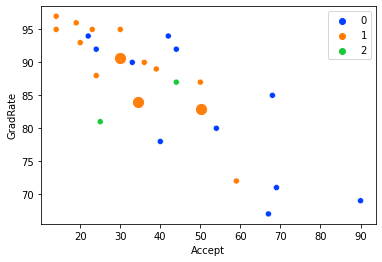

In [13]:
# Plotting "Accept" vs "GradeRate" because they are in same range(1 to 100)
sns.scatterplot(df.Accept,df.GradRate,hue=df.KMeans,palette="bright")
sns.scatterplot(x=centroid_df["C"],y=centroid_df["F"],s=150)

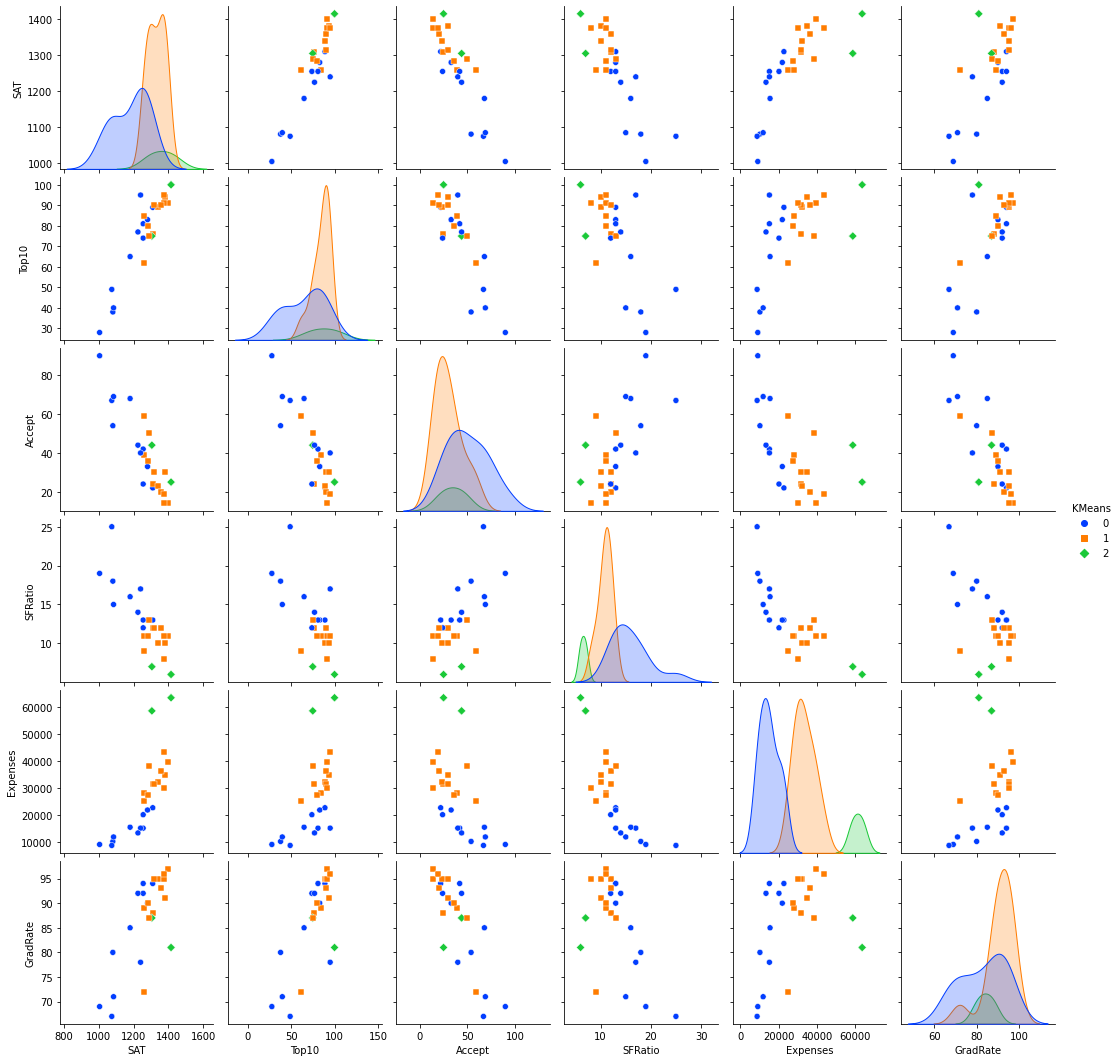

In [14]:
# Plotting PairPlot to see the clusters in wide perspective ie. to see patterns
sns.pairplot(df,hue='KMeans',markers=["o", "s", "D"],palette="bright")

# Hirearchical

In [15]:
import scipy.cluster.hierarchy as sch

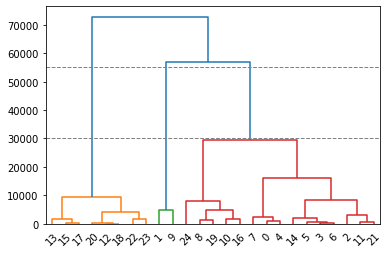

In [16]:
# Dendogram
lk = sch.linkage(X,method="ward")
ddg = sch.dendrogram(lk)

# horizontal Line
plt.axhline(y=30000, c='grey', lw=1, linestyle='dashed')
plt.axhline(y=55000, c='grey', lw=1, linestyle='dashed')

- The above line cuts the Dendogram into 3 clusters having the biggest stems

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
AGC = AgglomerativeClustering(n_clusters=3)
Label = AGC.fit_predict(X)
Label


array([0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0], dtype=int64)

In [19]:
df['Hirearchical'] = Label

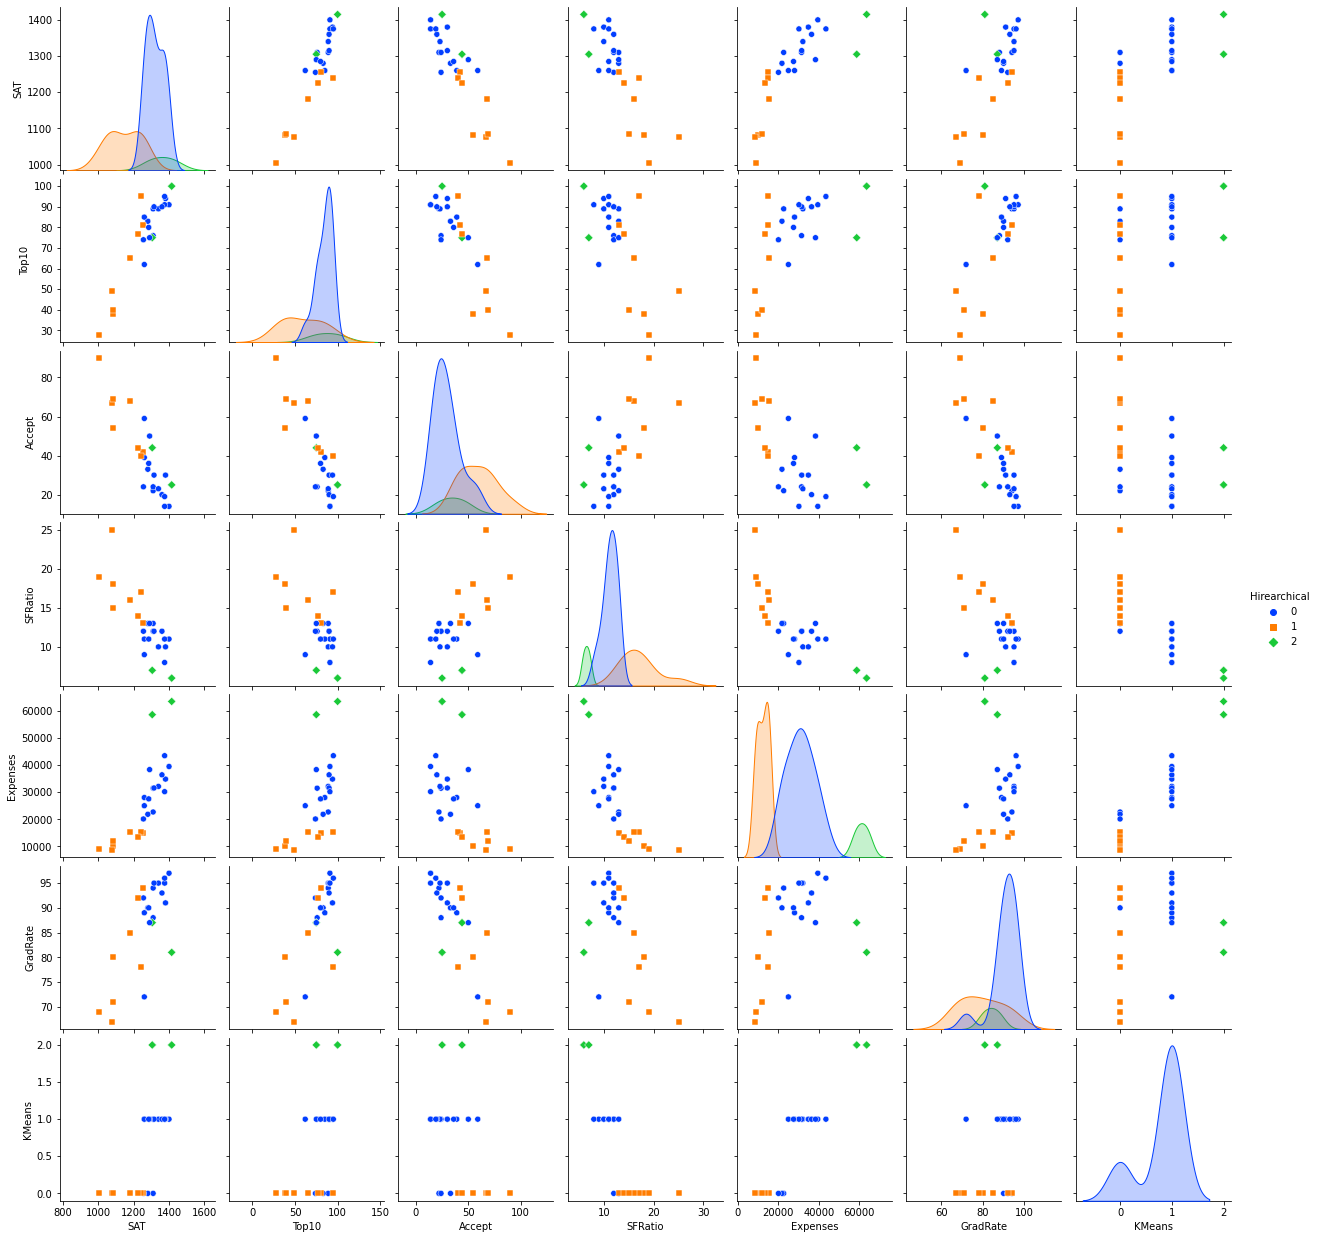

In [20]:
# Plotting PairPlot to see the clusters in wide perspective ie. to see patterns
sns.pairplot(df,hue='Hirearchical',markers=["o", "s", "D"],palette="bright")